# Example 6.5

Find the stresses acting on the plane defined by angle using the pole method

## Data:

$\sigma_1=\sigma_y=52$ kPa

$\sigma_3=\sigma_x=12$ kPa

$\alpha= 35$ degrees

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Get_stress_at_alpha(S_Tensor, alpha):
    #alpha in radians
    s_m=(S_Tensor[0][0]+S_Tensor[1][1])/2
    s_d=S_Tensor[1][1]-S_Tensor[0][0]
    sigma_alpha= s_m+ 0.5*s_d*np.cos(2*alpha)+S_Tensor[0][1]*np.sin(2*alpha)
    tau_alpha=0.5*s_d*np.sin(2*alpha)-S_Tensor[0][1]*np.cos(2*alpha)
    return sigma_alpha, tau_alpha

In [3]:
# Set Tau to zero and find principal stresses
def Get_principal_stresses(S):
    s_d=S[1][1]-S[0][0]
    alpha=0.5*np.arctan(2*S[0][1]/s_d)
    beta=alpha+0.5*np.pi
    s1, _=Get_stress_at_alpha(S, alpha)
    s2,_=Get_stress_at_alpha(S, beta)
    if (s1>s2):
        s_1a=s1
        s_2a=s2
    else:
        s_1a=s2
        s_2a=s1
    return s_1a, s_2a, alpha, beta

In [4]:
S=[[12, 0], [0, 52]]
alpha=35*np.pi/180
sigma_alpha, tau_alpha=Get_stress_at_alpha(S, alpha)

print('sigma_alpha= %1.2f kPa' % sigma_alpha)
print('tau_alpha= %1.2f kPa' % tau_alpha)

sigma_alpha= 38.84 kPa
tau_alpha= 18.79 kPa


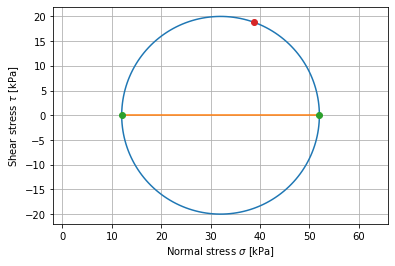

In [6]:
alpha=np.linspace(0, np.pi, 180)

sigma, tau=Get_stress_at_alpha(S, alpha)

plt.plot(sigma, tau)
plt.xlabel(r'Normal stress $\sigma$ [kPa]')
plt.ylabel(r'Shear stress $\tau$ [kPa]')

plt.plot([S[0][0], S[1][1]],[S[0][1], S[1][0]] )
plt.plot([S[0][0], S[1][1]],[S[0][1], S[1][0]], 'o' )
plt.plot(sigma_alpha, tau_alpha, 'o')
plt.gca().axis('equal')
plt.gca().grid('True')